##  Práctica: Predicción del precio de automóviles con Regresión Lineal Múltiple

###  Contexto

Una empresa automovilística china, **Geely Auto**, desea establecerse en el mercado estadounidense. Para ello, necesita **comprender qué factores influyen en el precio de los coches**. Tu tarea será construir un modelo predictivo con **Python y scikit-learn** que estime el precio de un automóvil a partir de sus características técnicas.

El conjunto de datos `CarPrice_Assignment.csv` contiene información de 205 modelos de coches vendidos en EE. UU., con variables como el tipo de combustible, tamaño del motor, peso, potencia, número de puertas, entre otros.

---

###  Objetivos de aprendizaje

* Aplicar el flujo completo de un **proyecto de Machine Learning supervisado**.
* Limpiar, analizar y preparar datos para su uso en un modelo predictivo.
* Entrenar y evaluar un modelo de **regresión lineal múltiple**.
* Interpretar los coeficientes y evaluar el rendimiento del modelo.
* Representar gráficamente los resultados y comunicar conclusiones.

---

###  Conocimientos previos

* Python y bibliotecas: `pandas`, `numpy`, `matplotlib`, `seaborn`, `sklearn`.
* Conceptos básicos de regresión lineal y normalización de variables.




---

###  Desarrollo paso a paso

#### **Paso 1: Cargar y explorar los datos**

In [667]:
#Importamos la libreria de pandas
#Creamos un dataframe a partir del csv CarPriceAssignment
import pandas as pd
df = pd.read_csv("./dataset/CarPrice_Assignment.csv")


In [668]:
#Mostramos la información del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [669]:
#Mostramos los valores descriptivos del dataframe
df.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [670]:
#Con el head() mostramos todo los tipos de datos
df.head(9)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.0
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.0


Vemos la cantidad de nulos que tiene el **dataframe**


In [671]:
#Creamos una copia para no modificar el dataframe actual
df2 = df.copy()
#Miramos si exiten nulos y vemos cuanto ocupa en el dataframe(es decir cuantos nulos % tengo en esa columna)
df2.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Mostramos las columnas **categóricas** y **numéricas** y la **forma** que tiene

In [672]:
cat_cols = df2.select_dtypes(include=["object"]).columns
print(f"Las columnas con variables categoricas son{cat_cols}")
cat_cols1 = df2.select_dtypes(include=["int64"]).columns
cat_cols2 = df2.select_dtypes(include=["Float64"]).columns
print(f"Las columnas con valores numéricos son: {cat_cols1,cat_cols2}")
print(f"La forma de este df es {df2.shape}")

Las columnas con variables categoricas sonIndex(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')
Las columnas con valores numéricos son: (Index(['car_ID', 'symboling', 'curbweight', 'enginesize', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object'), Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'price'],
      dtype='object'))
La forma de este df es (205, 26)


* Comprueba número de filas y columnas.
* Identifica valores nulos o erróneos.
* Observa qué columnas podrían ser **variables categóricas** y cuáles **numéricas**.


#### **Paso 2: Limpieza de datos**

1. Extrae el nombre de la compañía de `CarName`.
2. Corrige errores ortográficos comunes (`vokswagen`, `toyouta`, etc.).
3. Elimina duplicados, si los hubiera.
4. Convierte todas las cadenas de texto a minúsculas.

Extraemos el nombre de la compañía de la columna **Carname**

In [673]:
# Extraer el primer elemento del string y lo ponemos en mayúscula y lo añadimos a una columna nueva
df2['company'] = df2['CarName'].str.split().str[0].str.capitalize()
df2["company"] = df2["company"].astype(str)

print(df2["company"])

0      Alfa-romero
1      Alfa-romero
2      Alfa-romero
3             Audi
4             Audi
          ...     
200          Volvo
201          Volvo
202          Volvo
203          Volvo
204          Volvo
Name: company, Length: 205, dtype: object


Corregimos errores **ortográficos**

In [674]:
#Corregimos los errores ortográficos en la columna de company
df2.loc[51, "company"] = "Mazda"
df2.loc[52, "company"] = "Mazda"
df2.loc[127, "company"] = "Porsche"
df2.loc[182, "company"] = "Toyota"
df2.loc[190, "company"] = "Volkswagen"
df2.loc[191, "company"] = "Volkswagen"
df2.loc[183, "company"] = "Volkswagen"

In [675]:
#Comprombamos que se ha modificado
print(df2.loc[51])

car_ID                            52
symboling                          1
CarName             maxda glc deluxe
fueltype                         gas
aspiration                       std
doornumber                       two
carbody                    hatchback
drivewheel                       fwd
enginelocation                 front
wheelbase                       93.1
carlength                      159.1
carwidth                        64.2
carheight                       54.1
curbweight                      1900
enginetype                       ohc
cylindernumber                  four
enginesize                        91
fuelsystem                      2bbl
boreratio                       3.03
stroke                          3.15
compressionratio                 9.0
horsepower                        68
peakrpm                         5000
citympg                           31
highwaympg                        38
price                         6095.0
company                        Mazda
N

Comprobamos si existen **duplicados**


In [676]:
#Comprobamos si hay duplicados
print(f"Número de duplicados {df2.duplicated().sum()}")

Número de duplicados 0


Convertimos las cadenas de texto a **minúsculas**

In [677]:
#Sacamos las columnas que tienen string
cat_cols = df2.select_dtypes(include=["object"]).columns
df2[cat_cols] = df2[cat_cols].astype("string")
#Le cambiamos el tipo a string y lo ponemos en minúscula
for col in cat_cols:
    df2[col] = df2[col].str.lower()

#Comprobamos que están en minúsculas
df2.head(9)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0,audi
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0,audi
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.0,audi
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.0,audi


#### **Paso 3: Análisis exploratorio**

* Visualiza la distribución de los precios.
* Muestra histogramas y diagramas de caja de las variables principales:

  * `fueltype`, `carbody`, `drivewheel`, `enginetype`
  * `horsepower`, `enginesize`, `curbweight`, `carwidth`
* Calcula la **matriz de correlación** y representa el **heatmap**.

Mostramos histograma, boxplot y correalaciones numéricas y gráficas

**Convertimos** las columnas *categóricas* a **numéricas** con .get_dummies()

Para poder visualizar los datos en las **gráficas** (Crearemos un nuevo df = df3 con las columnas de df2 que vamos a mostrar)

In [678]:
print(df2.head(5).to_string())
#Quitamos carname
print("Creamos un nuevo dataframe con las columnas que vamos a utilizar")
df3 = df2[["fueltype","carbody","drivewheel","enginetype","enginesize","horsepower","curbweight","carwidth","price"]]


   car_ID  symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price      company
0       1          3        alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romero
1       2          3       alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romero
2       3          1  alfa-romero 

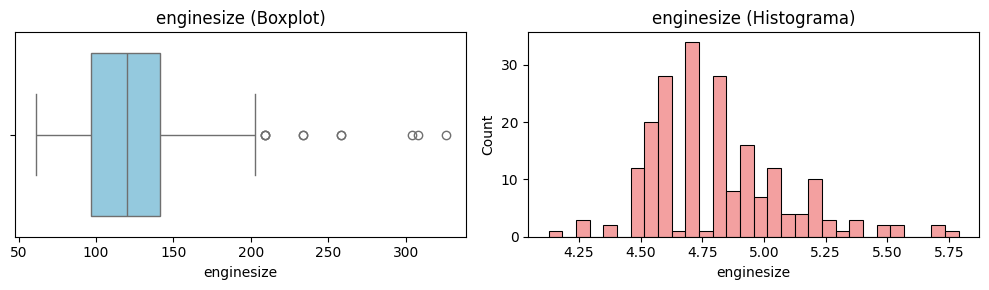

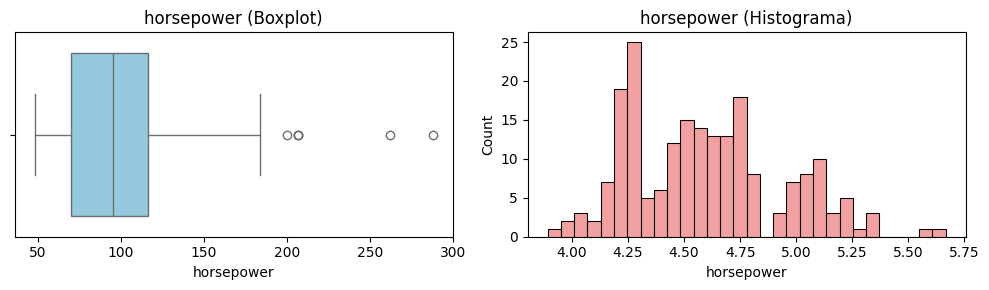

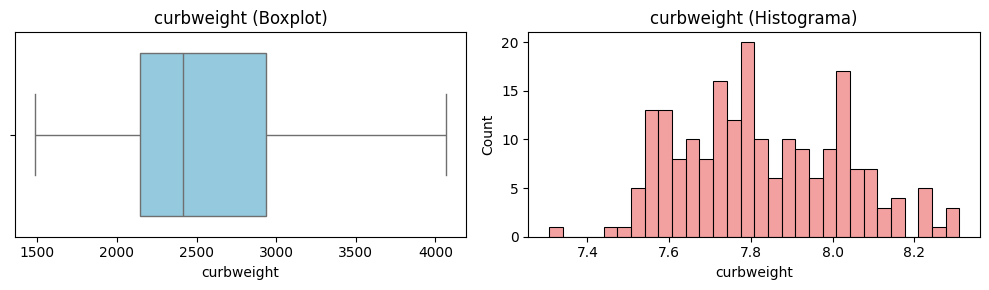

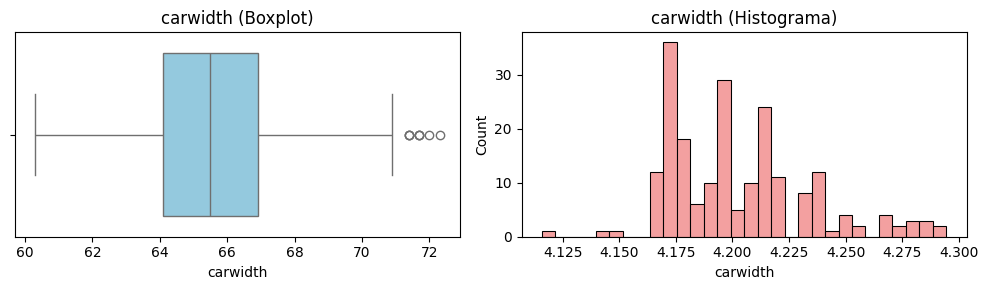

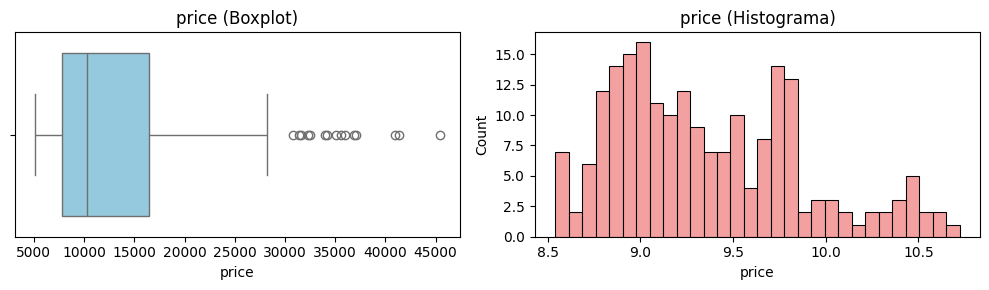

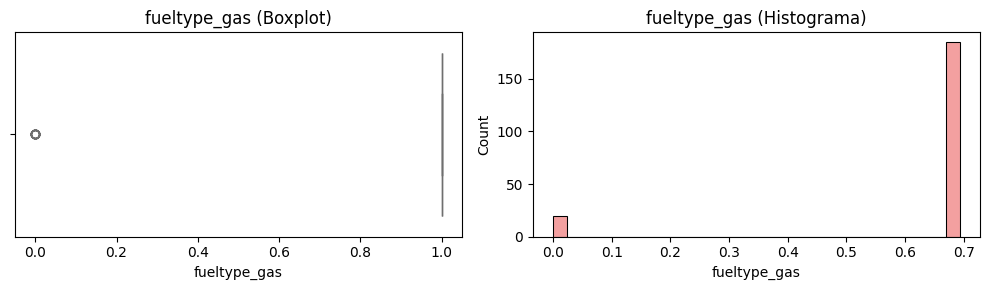

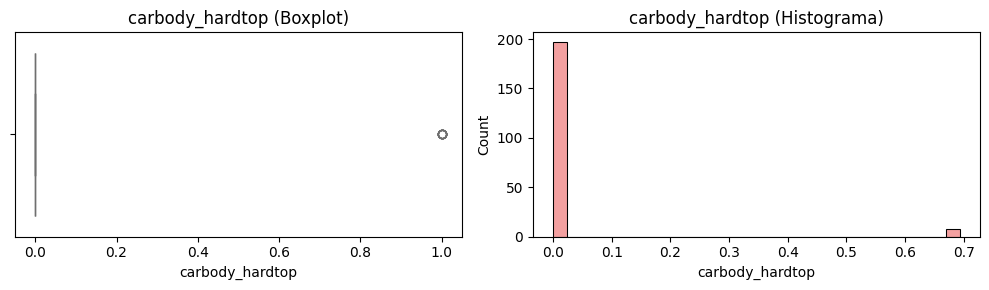

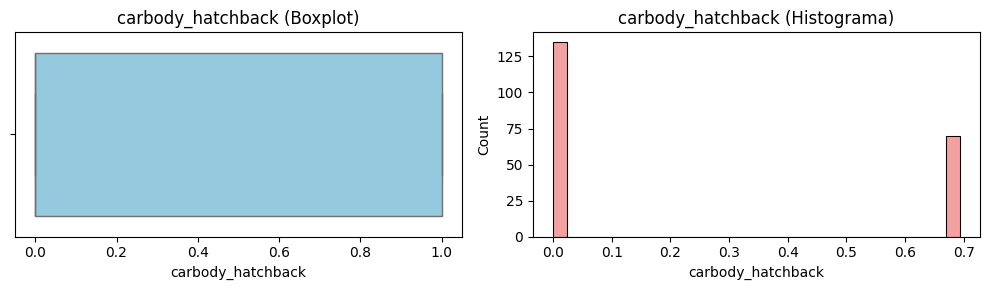

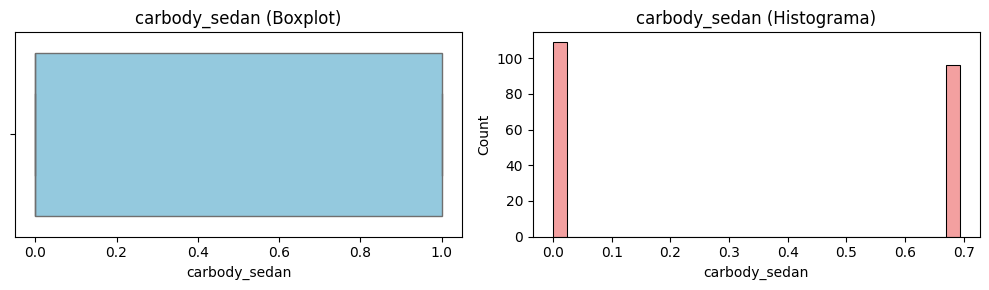

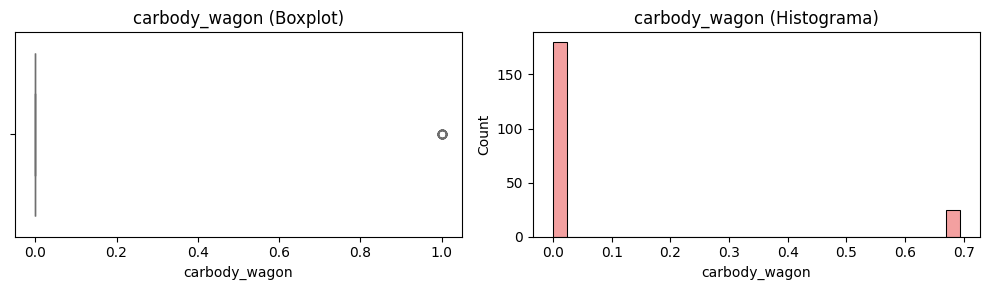

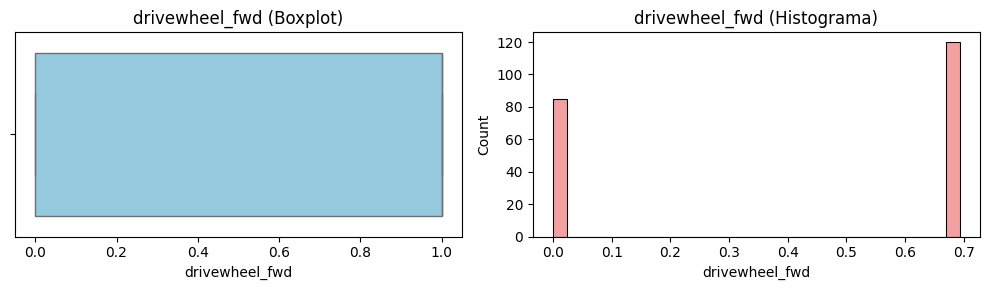

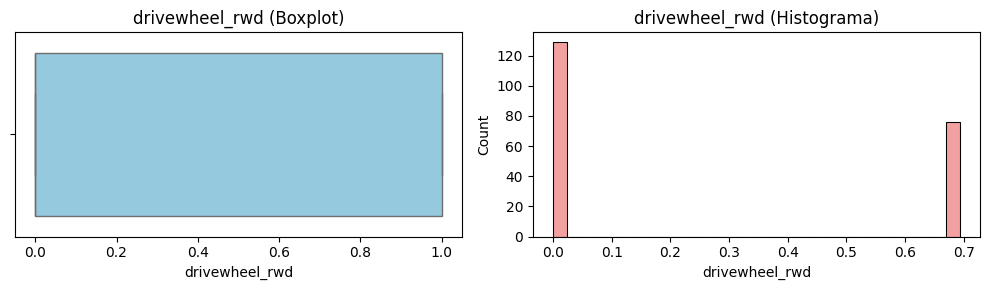

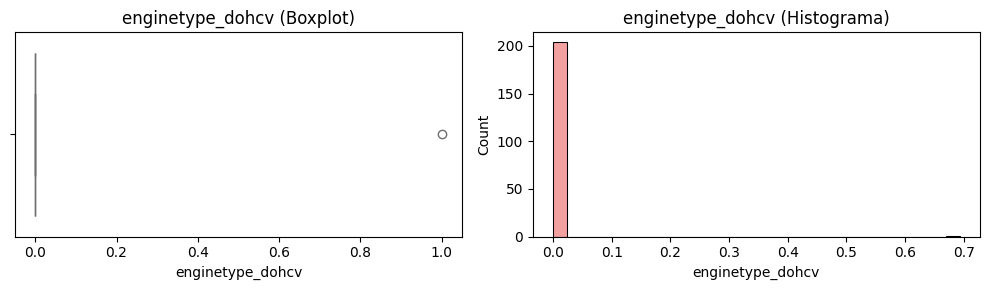

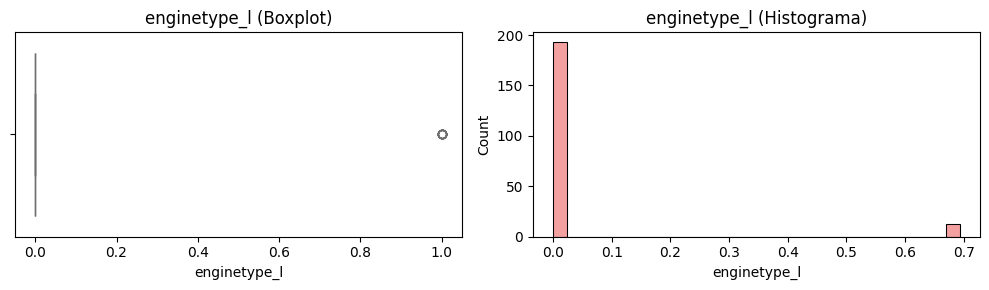

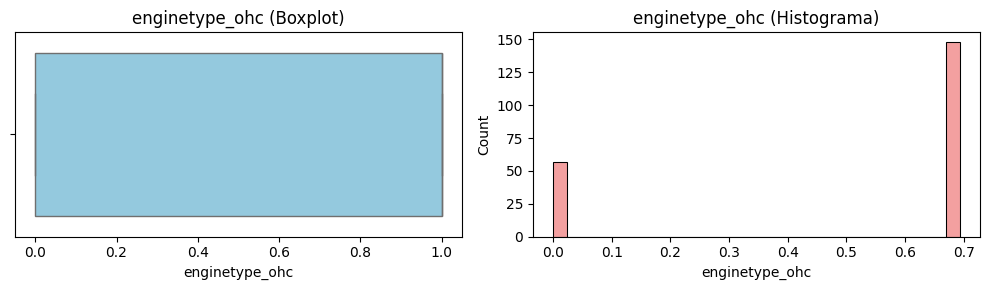

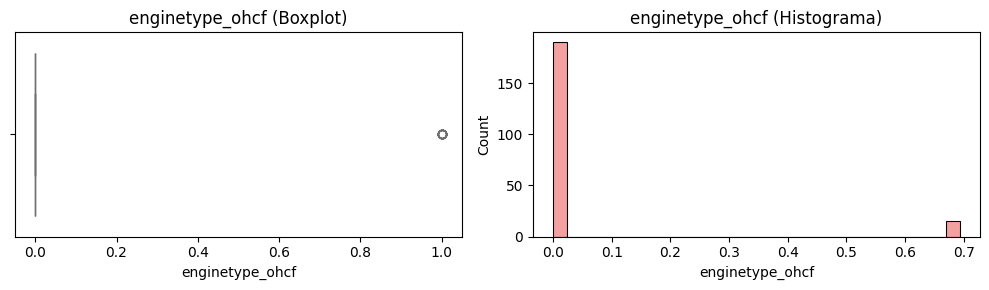

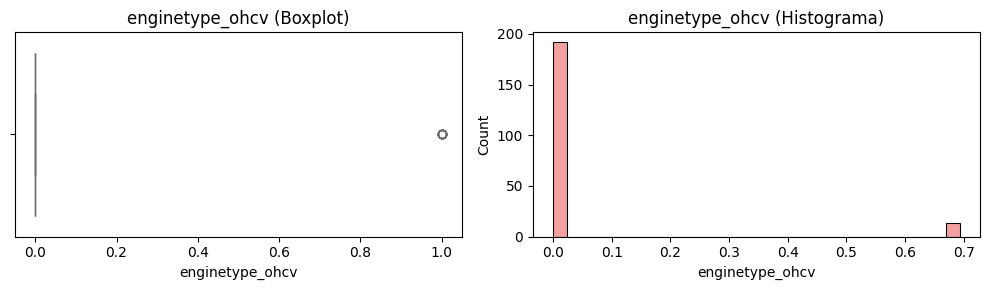

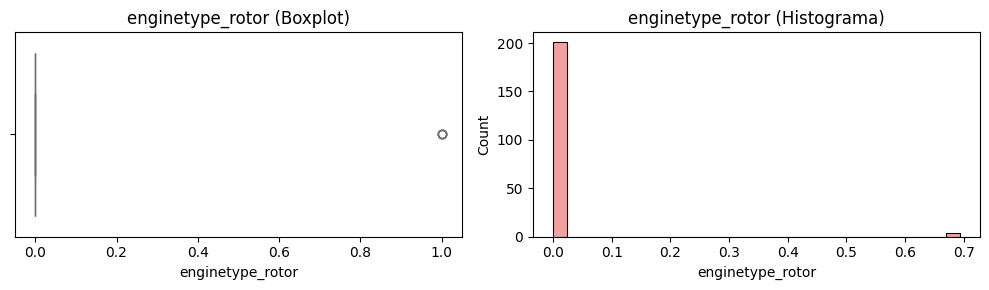

In [679]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Necesitamos valores numéricos para mostrar los gráficos
df3 = pd.get_dummies(df3, columns=['fueltype',"carbody","drivewheel","enginetype"], drop_first=True,dtype=int)

cols = df3.columns
for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    sns.boxplot(x=df3[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f'{col} (Boxplot)')
    sns.histplot(np.log1p(df3[col]), bins=30, ax=axes[1], color='lightcoral')
    axes[1].set_title(f'{col} (Histograma)')
    plt.tight_layout()
plt.show()

Mostramos la correlación tanto numéricamente como gráficamente
                   enginesize  horsepower  curbweight  carwidth     price  fueltype_gas  carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor
enginesize           1.000000    0.809769    0.850594  0.735433  0.874145     -0.069594         0.239363          -0.216805       0.088459      -0.027518       -0.518391        0.565509          0.128248      0.016063       -0.363334        -0.016508         0.562403         -0.184762
horsepower           0.809769    1.000000    0.750739  0.640732  0.808139      0.163926         0.194801          -0.053770      -0.024097      -0.063081       -0.544438        0.575564          0.326367     -0.054469       -0.427616         0.044752         0.431539          0.019250
curbweight           0.850594    0.750739    1.000000  0.867032  0.835305     -

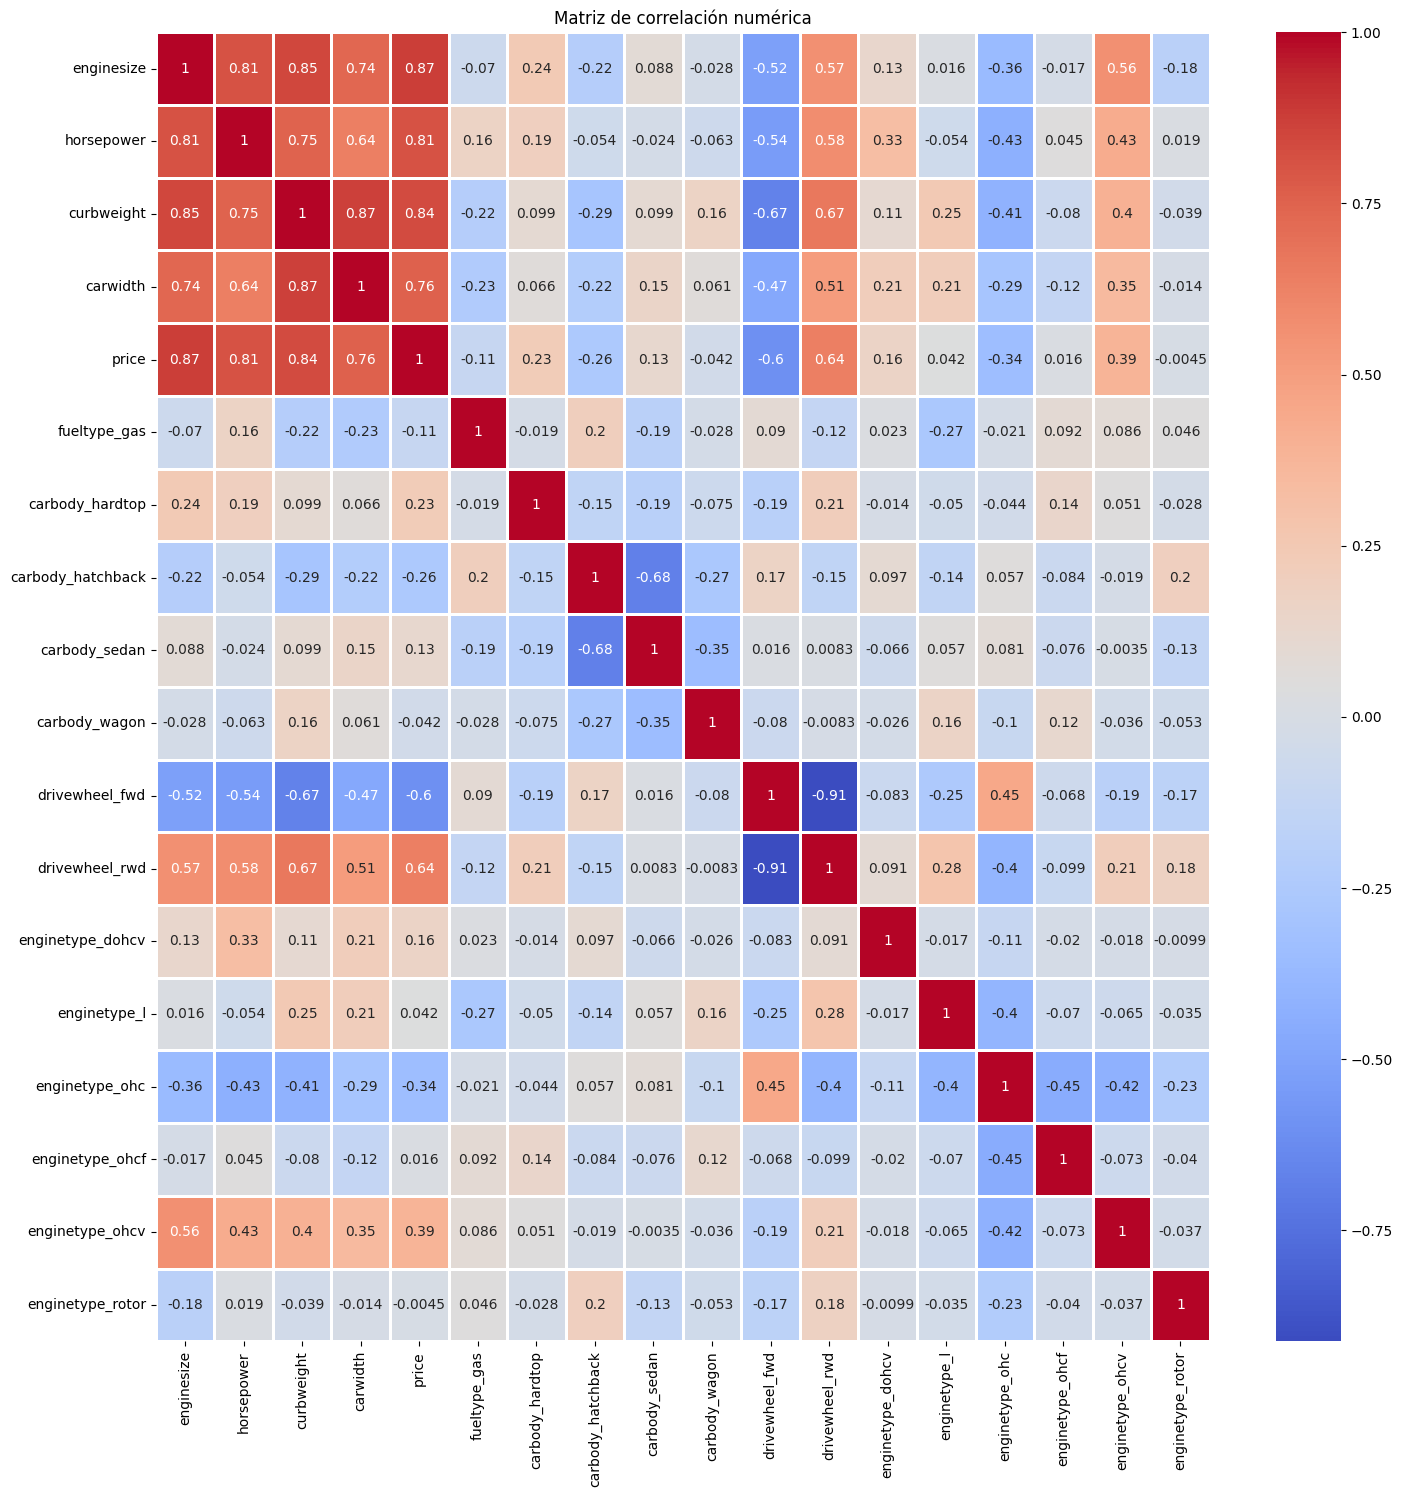

In [680]:
print("Mostramos la correlación tanto numéricamente como gráficamente")
corr = df3.corr()
print(corr.to_string())


plt.figure(figsize=(17,17))
sns.heatmap(df3.corr(numeric_only=True), annot=True, linewidths=2, cmap='coolwarm')
plt.title("Matriz de correlación numérica")
plt.show()


Mostramos los gráficos de las columnas con más correlación respecto a *Price*

Relación de Horsepower con Price

<Axes: xlabel='horsepower', ylabel='price'>

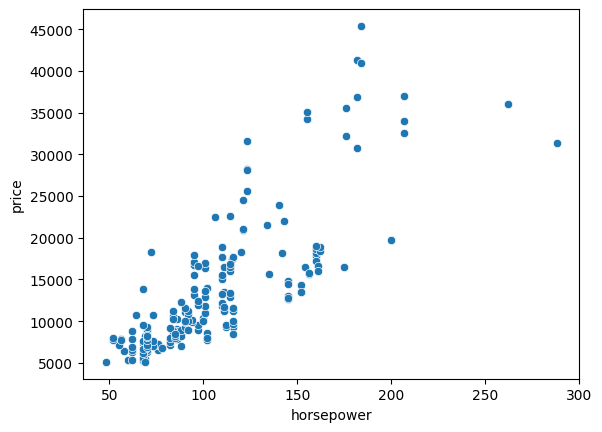

In [681]:
sns.scatterplot(data=df3, x="horsepower", y="price")

Relación de Enginesize con Price

<Axes: xlabel='enginesize', ylabel='price'>

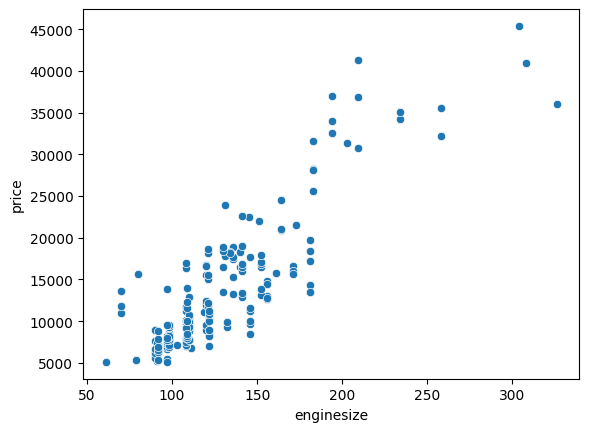

In [682]:
sns.scatterplot(data=df3, x="enginesize", y="price")

Relación de Curbweight con Price

<Axes: xlabel='curbweight', ylabel='price'>

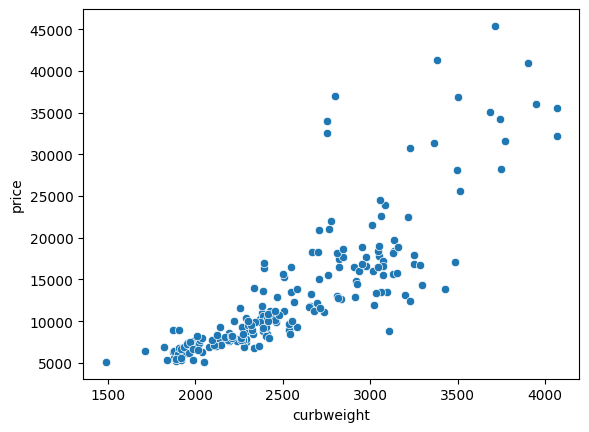

In [683]:
sns.scatterplot(data=df3, x="curbweight", y="price")

Relación de Carwidth con Price


<Axes: xlabel='carwidth', ylabel='price'>

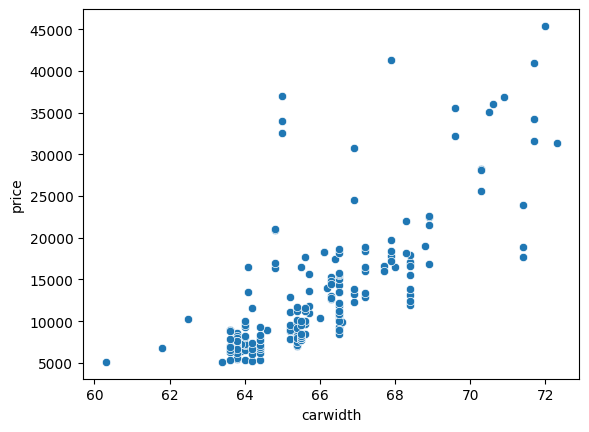

In [684]:
sns.scatterplot(data=df3, x="carwidth", y="price")

Relación de Drivewheel con Price

<Axes: xlabel='drivewheel_rwd', ylabel='price'>

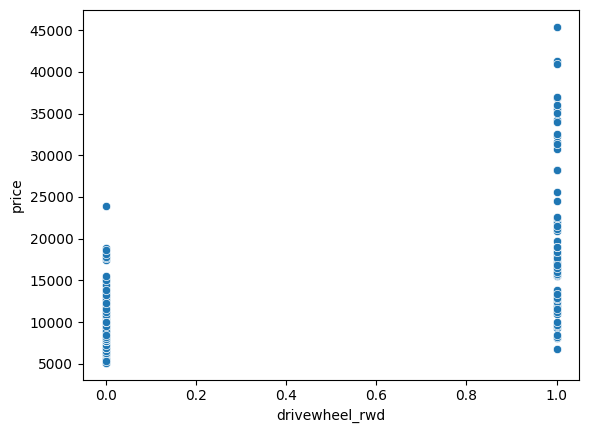

In [685]:

sns.scatterplot(data=df3, x="drivewheel_rwd", y="price")


Como existen **Outliers**, los ajustamos al percentil *0.01* y *0.99*, para seguir manteniendo valores altos que pero que no sean tan extremos para que modifiquen tanto el modelo

In [686]:
print("Comprobamos el numero de outliers en las columnas ")

ajuste_outliers = df3[["enginesize","horsepower","carwidth","price"]].columns

#Comprobamos si existen outliers o no
for columna in df3[ajuste_outliers]:

    Q1, Q3 = df3[columna].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    mask = (df3[columna] < Q1 - 1.5*IQR) | (df3[columna] > Q3 + 1.5*IQR)
    print(f"{columna}: {mask.sum()} outliers ({mask.mean()*100:.2f}%)")

#Ajustamos outliers
for columna in df3[ajuste_outliers]:
    q_low = df3[columna].quantile(0.05)
    q_high = df3[columna].quantile(0.95)
    df3[columna] = df3[columna].clip(q_low,q_high)
#Comprobamos que funciona 
for columna in df3[ajuste_outliers]:
    Q1, Q3 = df3[columna].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    mask = (df3[columna] < Q1 - 1.5*IQR) | (df3[columna] > Q3 + 1.5*IQR)
    print(f"{columna}: {mask.sum()} outliers ({mask.mean()*100:.2f}%)")

Comprobamos el numero de outliers en las columnas 
enginesize: 10 outliers (4.88%)
horsepower: 6 outliers (2.93%)
carwidth: 8 outliers (3.90%)
price: 15 outliers (7.32%)
enginesize: 0 outliers (0.00%)
horsepower: 0 outliers (0.00%)
carwidth: 0 outliers (0.00%)
price: 15 outliers (7.32%)


Mostramos graficamente los Boxplot e histogramas con los datos ajustados a los **percentiles**

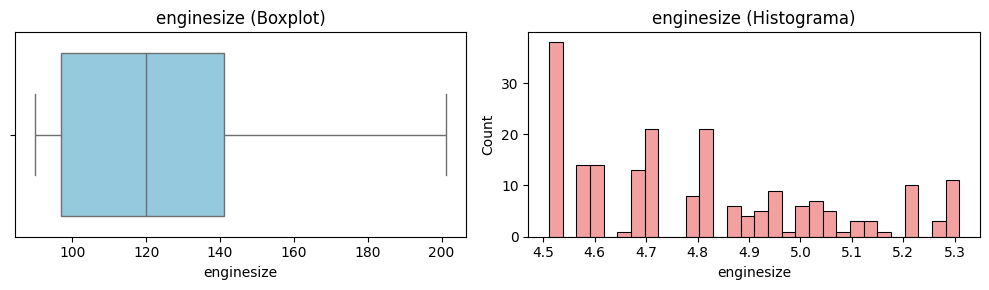

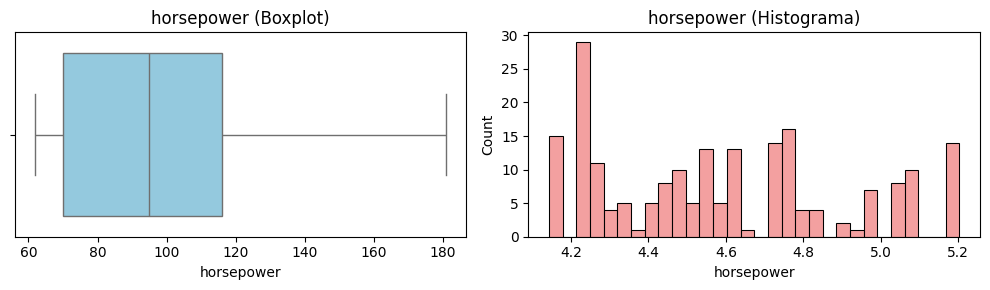

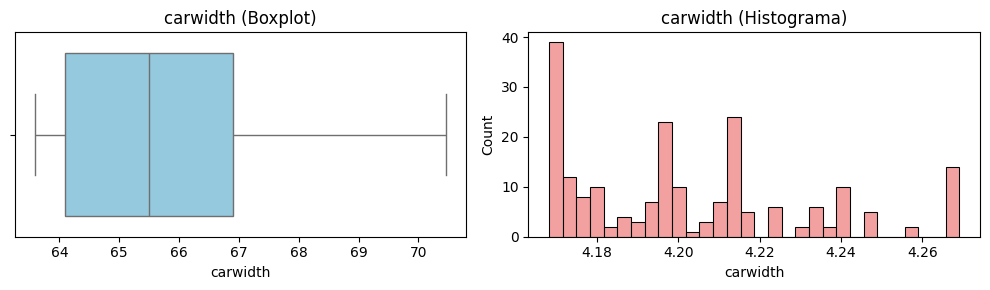

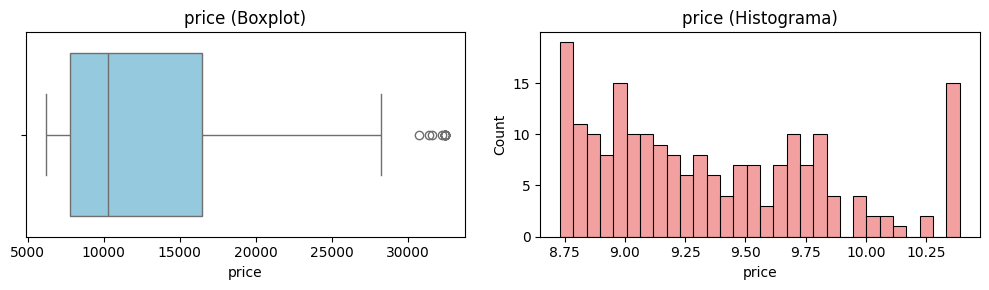

In [687]:
for col in ajuste_outliers:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    sns.boxplot(x=df3[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f'{col} (Boxplot)')
    sns.histplot(np.log1p(df3[col]), bins=30, ax=axes[1], color='lightcoral')
    axes[1].set_title(f'{col} (Histograma)')
    plt.tight_layout()
plt.show()

#### **Paso 4: Generar nuevas variables**

* Crea una variable `fueleconomy = 0.55 * citympg + 0.45 * highwaympg`
* Agrupa las compañías por precio medio y clasifícalas como:

  * `Budget` (menos de 10 000 $)
  * `Medium` (10 000 – 20 000 $)
  * `Highend` (más de 20 000 $)


In [688]:
#Creamos la columna fueleconomy
df3["fueleconomy"] = 0.55 * df2["citympg"] + 0.45 * df2["highwaympg"]
#Volvemos a agregar company 
df3["company"] = df2["company"]
#Calculamos el precio medio por compañia
precio_medio_compania = df3.groupby("company")["price"].mean()
#Comparamos el precio segun lo establecido
df3["A_company"] = pd.cut(
    df3["company"].map(precio_medio_compania),
    bins=[0, 10000, 20000, float("inf")],
    labels=["Budget", "Medium", "Highend"]
)
print(df3.head(9).to_string())


   enginesize  horsepower  curbweight  carwidth    price  fueltype_gas  carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  fueleconomy      company A_company
0       130.0       111.0        2548     64.10  13495.0             1                0                  0              0              0               0               1                 0             0               0                0                0                 0        23.70  alfa-romero    Medium
1       130.0       111.0        2548     64.10  16500.0             1                0                  0              0              0               0               1                 0             0               0                0                0                 0        23.70  alfa-romero    Medium
2       152.0       154.0        2823     65.50  16500.0             1               

#### **Paso 5: Preparar datos para el modelo**

1. Selecciona las variables más significativas (numéricas + categóricas).
2. Genera **variables dummy** con `pd.get_dummies()` (drop_first=True).
3. Divide en **X** (predictoras) e **y** (precio).
4. Realiza un **train-test split** (70 % – 30 %).
5. Aplica **normalización Min-Max o Z-score** sobre las variables numéricas.


Seleccionamos las variables mas significativas para entrenar el modelo.

Como tenemos **variables nuevas**, volvemos a ver la correlación con estas nuevas También


In [689]:
#Creamos dummies de las variables nuevas generadas
print("Nos falta por convertir a dummie company y A_company")

df3 = pd.get_dummies(df3, columns=["company","A_company"], drop_first=True,dtype=int)
corr = df3.corr()
print("Vemos la correlación con las nuevas variables + las anteriores")
df3.corr(numeric_only=True)["price"].sort_values(ascending=False)

Nos falta por convertir a dummie company y A_company
Vemos la correlación con las nuevas variables + las anteriores


price                 1.000000
enginesize            0.868257
curbweight            0.851883
horsepower            0.817114
A_company_Highend     0.791610
carwidth              0.772300
drivewheel_rwd        0.661004
company_buick         0.488725
enginetype_ohcv       0.355561
company_jaguar        0.328987
company_porsche       0.325534
company_bmw           0.320747
carbody_hardtop       0.206206
company_porcshce      0.189732
enginetype_dohcv      0.179255
company_volvo         0.166270
carbody_sedan         0.127986
company_audi          0.125936
company_peugeot       0.080698
enginetype_l          0.057548
company_saab          0.052403
A_company_Medium      0.043240
company_mercury       0.033638
company_toyouta       0.026278
enginetype_ohcf       0.013250
enginetype_rotor     -0.000820
company_vw           -0.014336
carbody_wagon        -0.035883
company_renault      -0.048038
company_maxda        -0.067099
company_isuzu        -0.081636
company_mazda        -0.083728
company_

Las columnas que vamos a utiliza son columnas = **enginesize curbweight horsepower A_company_Highend carwidth**

In [690]:
#Dividimos el dataset en los valores de entrenamiento y test
#Para ello importamos la libreria random
import random 

print("Dividimos el dataset al 70-30 en valores de entrenamiento y test")
msk = np.random.rand(len(df3)) < 0.7
#Valor de train
train = df3[msk]
#Valor de test != valor
test = df3[~msk]

df3.head(9)

Dividimos el dataset al 70-30 en valores de entrenamiento y test


,enginesize,horsepower,curbweight,carwidth,price,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,...,company_renault,company_saab,company_subaru,company_toyota,company_toyouta,company_volkswagen,company_volvo,company_vw,A_company_Medium,A_company_Highend
0,130.0,111.0,2548,64.10,13495.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,130.0,111.0,2548,64.10,16500.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,152.0,154.0,2823,65.50,16500.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,109.0,102.0,2337,66.20,13950.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,136.0,115.0,2824,66.40,17450.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,136.0,110.0,2507,66.30,15250.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,136.0,110.0,2844,70.46,17710.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7,136.0,110.0,2954,70.46,18920.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,131.0,140.0,3086,70.46,23875.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [691]:
#Creamos los valores de test y train con sus variables dependientes e independientes (primero voy a tomar los 3 independiente)
print("A la que dividimos el dataset en x e y normalizamos ")
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train[["horsepower","enginesize","curbweight","carwidth"]])
test_x = scaler.transform(test[["horsepower","enginesize","curbweight","carwidth"]])


train_y = np.asanyarray(train["price"])
test_y = np.asanyarray(test["price"])



A la que dividimos el dataset en x e y normalizamos 


#### **Paso 6: Entrenamiento del modelo**

In [692]:
from sklearn.linear_model import LinearRegression
#Creamos el modelo
modelo_multiple = LinearRegression()
modelo_multiple.fit(train_x,train_y)
#CREAMOS los valores predictivos

y_pred = modelo_multiple.predict(test_x)



#### **Paso 7: Evaluación**

Calcula las métricas:

In [693]:
#Calculamos las métricas importamos la libreria correspondiente (multiple)
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
maeM = mean_absolute_error(test_y, y_pred)
mseM = mean_squared_error(test_y, y_pred)
rmseM = np.sqrt(mseM)
r2M = r2_score(test_y, y_pred)
print(f"MAE = {maeM:.3f}")
print(f"MSE = {mseM:.3f}")
print(f"RMSE = {rmseM:.3f}")
print(f"R2 = {r2M:.3f}")

modelo_multiple.coef_

MAE = 2473.392
MSE = 13034862.037
RMSE = 3610.383
R2 = 0.810


array([4505.24032557, 6098.42903452, 9095.54763753, 5979.67106732])

Representa la relación entre los valores reales y predichos:


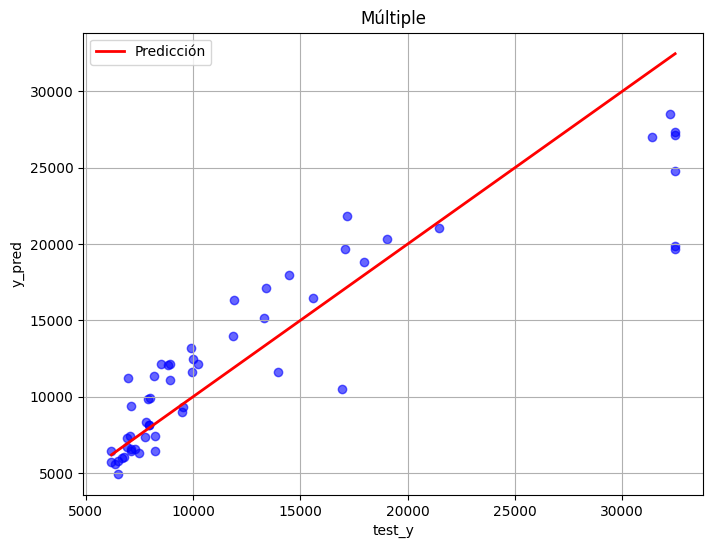

Los coeficientes de las columnas son:
Horsepower = 4505.240325570502
Enginesize = 6098.429034524763
Curbweight = 9095.547637531028
Carwidth = 5979.6710673177095


In [694]:
plt.figure(figsize=(8,6))
plt.scatter(test_y, y_pred, color='blue', alpha=0.6)
plt.plot([test_y.min(), test_y.max()],
         [test_y.min(), test_y.max()],
         color='red', lw=2, label="Predicción")
plt.xlabel("test_y")
plt.ylabel("y_pred")
plt.title("Múltiple")
plt.legend()
plt.grid(True)
plt.show()
print(f"Los coeficientes de las columnas son:\nHorsepower = {modelo_multiple.coef_[0]}\nEnginesize = {modelo_multiple.coef_[1]}\nCurbweight = {modelo_multiple.coef_[2]}\nCarwidth = {modelo_multiple.coef_[3]}")



#### **Paso 8: Interpretación**

* Analiza los coeficientes (`lr.coef_`) para identificar qué variables influyen más.
* Comenta qué implicaciones tendría para el negocio (por ejemplo, “aumentar la potencia incrementa el precio, pero reducir el consumo mejora la eficiencia”).

MAE = 1899.300
MSE = 12009104.918
RMSE = 3465.416
R2 = 0.825
Los coeficientes de las columnas son:
Horsepower = 0.44524760207932396
Enginesize = 0.1365969740811983
Curbweight = 0.9475965842368527
Carwidth = 0.36032217225140056


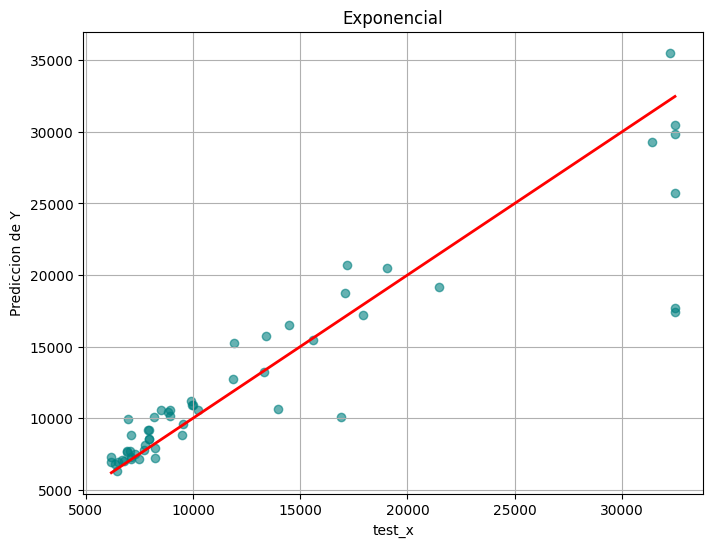

In [695]:
#exponencial 

# Normalización
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train[["horsepower","enginesize","curbweight","carwidth"]])
test_x = scaler.transform(test[["horsepower","enginesize","curbweight","carwidth"]])

# Transformación exponencial
train_y = np.log(train["price"])
test_y = np.log(test["price"])

# Modelo
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y)

# Predicción
pred_log = model.predict(test_x)
pred_price = np.exp(pred_log)

# Evaluación 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

test_real_price = np.exp(test_y)

mae = mean_absolute_error(test_real_price, pred_price)
mse = mean_squared_error(test_real_price, pred_price)
rmse = np.sqrt(mse)
r2 = r2_score(test_real_price, pred_price)

print(f"MAE = {mae:.3f}")
print(f"MSE = {mse:.3f}")
print(f"RMSE = {rmse:.3f}")
print(f"R2 = {r2:.3f}")


print(f"Los coeficientes de las columnas son:\nHorsepower = {model.coef_[0]}\nEnginesize = {model.coef_[1]}\nCurbweight = {model.coef_[2]}\nCarwidth = {model.coef_[3]}")

plt.figure(figsize = (8,6))
plt.scatter(test_real_price,pred_price, color="teal", alpha=0.6)
plt.plot([test_real_price.min(), test_real_price.max()],
        [test_real_price.min(), test_real_price.max()],
        color="red",lw=2,label="Prediction")
plt.xlabel("test_x")
plt.ylabel("Prediccion de Y")
plt.title("Exponencial")
plt.grid(True)
plt.show()



In [696]:
print("Como podemos ver con las métricas, es mejor el modelo exponencial")
print(f"MAE Múltiple = {maeM:.3f} MAE Exponencial = {mae:.3f}")
print(f"MSE Múltiple = {mseM:.3f} MSE Exponencial = {mse:.3f}")
print(f"RMSE Múltiple = {rmseM:.3f} RMSE Exponencial = {rmse:.3f}")
print(f"R2 Múltiple = {r2M:.3f} R2 Exponencial = {r2:.3f}")



Como podemos ver con las métricas, es mejor el modelo exponencial
MAE Múltiple = 2473.392 MAE Exponencial = 1899.300
MSE Múltiple = 13034862.037 MSE Exponencial = 12009104.918
RMSE Múltiple = 3610.383 RMSE Exponencial = 3465.416
R2 Múltiple = 0.810 R2 Exponencial = 0.825


#### Extra

- Investigar como exportar el modelo entrenado (`joblib` o `pickle`) para reutilizarlo.

- Investigar como utilizar otros modelos: **Ridge**, **Lasso**, **RandomForestRegressor**.


Para exportar el modelo, usaremos Joblib

Los coeficientes de los modelos muestran que el tamaño del motor, la potencia y el ancho del vehículo son los factores que más incrementan el precio, especialmente en la regresión lineal múltiple.
En el modelo exponencial, el peso del coche gana importancia relativa, indicando que influye de forma proporcional en el valor final.

In [697]:
print("Importamos Joblib")
import joblib
print("Exportamos el modelo de regresión múltiple")
joblib.dump(modelo_multiple, "modelo_multiple.pkl")
print("Exportamos el modelo de regresión exponencial")
joblib.dump(model, "modelo_exponencial.pkl")


Importamos Joblib
Exportamos el modelo de regresión múltiple
Exportamos el modelo de regresión exponencial


['modelo_exponencial.pkl']

Comprobamos que se ha exportado correctamente

In [698]:
modelo_cargado = joblib.load("modelo_multiple.pkl")
print("Modelo múltiple cargado correctamente:", modelo_cargado)

modelo_exp_cargado = joblib.load("modelo_exponencial.pkl")
print("Modelo exponencial cargado correctamente:", modelo_exp_cargado)


Modelo múltiple cargado correctamente: LinearRegression()
Modelo exponencial cargado correctamente: LinearRegression()


**Ridge Regression**

Es una regresion lineal normal que añade una penalización para evitar el sobreajuste
Penaliza los coeficientes grandes, pero nunca los lleva a Cero

Es útil cuando existe multicolinealidad (Variables muy relacionadas)
Para evitar sobreajuste

**Lasso Regression**

Exactamente igual que Ridge, pero la penalizacion puede llevar el coeficiente a 0

**RandomForestRegressior**

No es un modelo Lineal.
Funciona bien para datos complejos y no necesita normalización


*RIDGE*

In [699]:
print("Dividimos el dataset al 70-30 en valores de entrenamiento y test")
msk = np.random.rand(len(df3)) < 0.7
#Valor de train
train = df3[msk]
#Valor de test != valor
test = df3[~msk]
#Creamos los valores de test y train con sus variables dependientes e independientes (primero voy a tomar los 3 independiente)
print("A la que dividimos el dataset en x e y normalizamos ")
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train[["horsepower","enginesize","curbweight","carwidth"]])
test_x = scaler.transform(test[["horsepower","enginesize","curbweight","carwidth"]])


train_y = np.asanyarray(train["price"])
test_y = np.asanyarray(test["price"])


print("Para usar el Ridge")

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(train_x, train_y)
print("El parámetro alpha, a más grande sea, mas coeficientes tienden a 0")
pred_ridge = ridge.predict(test_x)


Dividimos el dataset al 70-30 en valores de entrenamiento y test
A la que dividimos el dataset en x e y normalizamos 
Para usar el Ridge
El parámetro alpha, a más grande sea, mas coeficientes tienden a 0


*Lasso*

In [700]:
print("Dividimos el dataset al 70-30 en valores de entrenamiento y test")
msk = np.random.rand(len(df3)) < 0.7
#Valor de train
train = df3[msk]
#Valor de test != valor
test = df3[~msk]
#Creamos los valores de test y train con sus variables dependientes e independientes (primero voy a tomar los 3 independiente)
print("A la que dividimos el dataset en x e y normalizamos ")
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train[["horsepower","enginesize","curbweight","carwidth"]])
test_x = scaler.transform(test[["horsepower","enginesize","curbweight","carwidth"]])


train_y = np.asanyarray(train["price"])
test_y = np.asanyarray(test["price"])


print("Para usar el Lasso")
from sklearn.linear_model import Lasso
print("El parámetro alpha, a más grande sea, mas coeficientes tienden a 0")
lasso = Lasso(alpha=0.1)
lasso.fit(train_x, train_y)

pred_lasso = lasso.predict(test_x)


Dividimos el dataset al 70-30 en valores de entrenamiento y test
A la que dividimos el dataset en x e y normalizamos 
Para usar el Lasso
El parámetro alpha, a más grande sea, mas coeficientes tienden a 0


*RandomForestRegression*

In [701]:
msk = np.random.rand(len(df3)) < 0.7
#Valor de train
train = df3[msk]
#Valor de test != valor
test = df3[~msk]
#Creamos los valores de test y train con sus variables dependientes e independientes (primero voy a tomar los 3 independiente)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train[["horsepower","enginesize","curbweight","carwidth"]])
test_x = scaler.transform(test[["horsepower","enginesize","curbweight","carwidth"]])


train_y = np.asanyarray(train["price"])
test_y = np.asanyarray(test["price"])


#Para usar el RandomForestRegression
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100, 
    random_state=42
)

rf.fit(train_x, train_y)

pred_rf = rf.predict(test_x)


### Rúbrica

| Criterio                      | Básico (5)                               | Esperado (7–8)                                      | Avanzado (9–10)                                               |
| ----------------------------- | ---------------------------------------- | --------------------------------------------------- | ------------------------------------------------------------- |
| Limpieza de datos             | Se corrigen nombres y nulos parcialmente | Dataset correctamente limpio                        | Incluye validaciones y comprobaciones automáticas             |
| Análisis exploratorio         | Usa pocas variables y gráficos simples   | Utiliza varios tipos de gráficos con interpretación | Detecta patrones relevantes y correlaciones significativas    |
| Modelo de regresión           | Modelo básico entrenado                  | Ajusta parámetros, evalúa R² y errores              | Compara varios modelos y justifica selección                  |
| Interpretación y conclusiones | Breves o genéricas                       | Conclusiones razonadas con datos                    | Analiza implicaciones de negocio y mejora                     |
| Presentación del notebook     | Desordenado o sin comentarios            | Bien estructurado y comentado                       | Incluye Markdown, secciones claras y resultados reproducibles |